Bibliothèques importées

 CHARGEMENT DES MODELES ET DONNEES
Donnees chargees : (1831, 69)
XGBoost disponible
Modele charge : Logistic Regression
Modele charge : Random Forest
Modele charge : XGBoost
Scaler charge

2. PREPARATION DES DONNEES
Features chargees depuis le fichier : 10 features

Features utilisees (10) :
    1. HomeGoals
    2. AwayGoals
    3. HT_HomeGoals
    4. HT_AwayGoals
    5. HomeShots
    6. AwayShots
    7. HomeShotsTarget
    8. AwayShotsTarget
    9. HomeFouls
   10. AwayFouls

Classes uniques dans la target : [-1, 0, 1]
Target finale (classes: [-1, 0, 1])
Distribution :
   - Exterieur  :  550 (30.0%)
   - Nul        :  445 (24.3%)
   - Domicile   :  836 (45.7%)

Dimensions :
   X : (1831, 10)
   y : (1831,)

3. CROSS-VALIDATION TEMPORELLE

Cross-validation pour Logistic Regression...
   Scores CV : [1. 1. 1.]
   Moyenne : 1.000 (+/- 0.000)

Cross-validation pour Random Forest...
   Scores CV : [0.985 0.993 1.   ]
   Moyenne : 0.993 (+/- 0.013)

Cross-validation

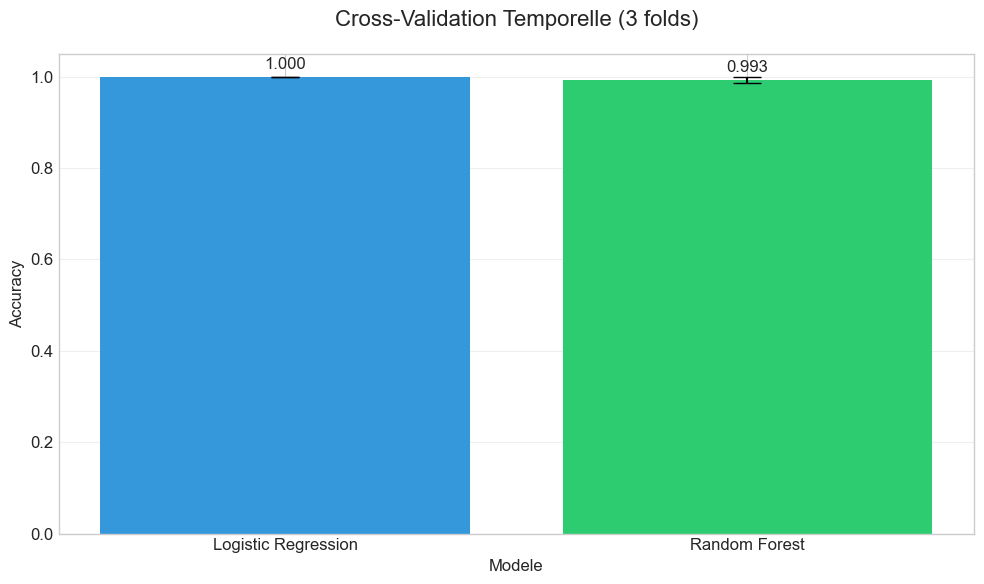


4. EVALUATION DETAILLEE

Evaluation detaillee : Logistic Regression
   Predictions uniques : [-1, 0, 1]
   Accuracy  : 1.000
   Precision : 1.000
   Recall    : 1.000
   F1-Score  : 1.000

   Matrice de confusion :
           Exterieur  Nul  Domicile
Exterieur        550    0         0
Nul                0  445         0
Domicile           0    0       836

Evaluation detaillee : Random Forest
   Predictions uniques : [-1, 0, 1]
   Accuracy  : 0.999
   Precision : 0.999
   Recall    : 0.999
   F1-Score  : 0.999

   Matrice de confusion :
           Exterieur  Nul  Domicile
Exterieur        550    0         0
Nul                1  443         1
Domicile           0    0       836

Evaluation detaillee : XGBoost
   Predictions uniques : [0, 1, 2]
   Ajustement des predictions aux classes cibles
   Accuracy  : 0.457
   Precision : 0.298
   Recall    : 0.457
   F1-Score  : 0.361

   Matrice de confusion :
           Exterieur  Nul  Domicile
Exterieur          0  550         0
Nul         

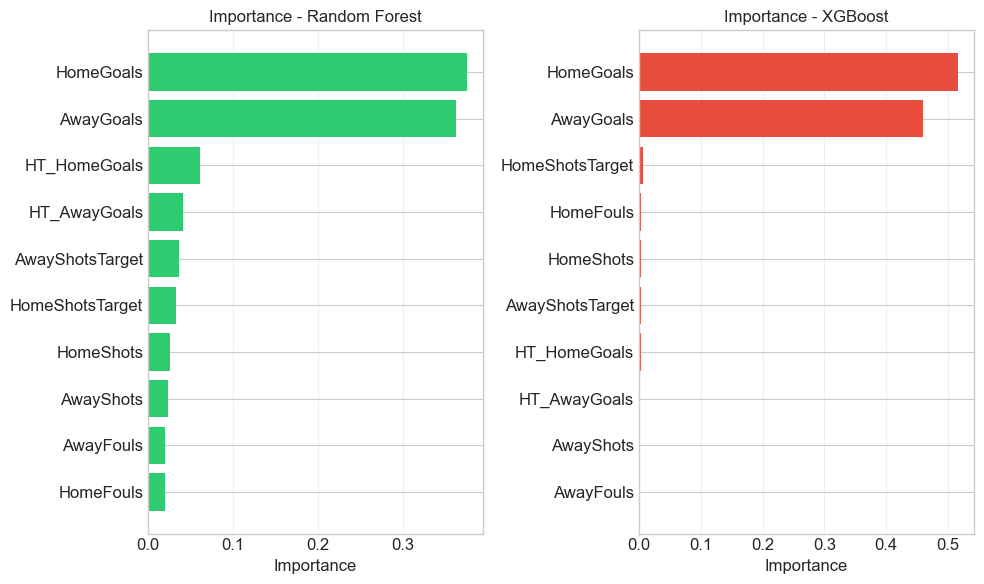


6. OPTIMISATION DES HYPERPARAMETRES
Optimisation sur echantillon de 200 matchs

Optimisation de Random Forest...
Meilleurs parametres Random Forest :
   {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
   Best score : 0.980

7. EVALUATION DES MODELES OPTIMISES

Random Forest Optimise :
   Accuracy : 0.979

Comparaison Random Forest :
   Original  : 0.999
   Optimise  : 0.979
   Pas d'amelioration

8. ANALYSE DES ERREURS
Meilleur modele : Logistic Regression
Accuracy : 1.000
Analyse des erreurs (Logistic Regression) :
   Total predictions : 1831
   Erreurs : 0 (0.0%)

Types d'erreurs :

9. SAUVEGARDE DES RESULTATS
Resultats d'evaluation sauvegardes : ../models/evaluation_results.csv
Modele Random Forest optimise sauvegarde dans ../models/optimized/
Resultats d'optimisation sauvegardes

 CONCLUSION DE L'EVALUATION

PERFORMANCES FINALES :

   Logistic Regression  :
     Accuracy  : 1.000
     F1-Score  : 1.000

   Random Forest        :
     Accuracy  : 0.999
     F1-Score 

In [3]:
# 04 - Évaluation Avancée et Optimisation
# Version corrigée pour les problèmes de matrice de confusion

# Importations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, roc_curve,
                           confusion_matrix, classification_report,
                           precision_score, recall_score)
import joblib
import warnings
import json
import os
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

# Configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliothèques importées")

# %%
# 1. Chargement des modèles et données
print("\n" + "="*70)
print(" CHARGEMENT DES MODELES ET DONNEES")
print("="*70)

# Charger les données
data_path = "../data/processed/matches_with_features.csv"
try:
    df = pd.read_csv(data_path)
    print(f"Donnees chargees : {df.shape}")
except FileNotFoundError:
    print("Fichier de donnees non trouve")
    exit()

# Charger les modèles entraînés
models = {}
model_files = {
    'Logistic Regression': '../models/logistic_regression.pkl',
    'Random Forest': '../models/random_forest.pkl'
}

# Essayer de charger XGBoost
try:
    if os.path.exists('../models/xgboost.pkl'):
        model_files['XGBoost'] = '../models/xgboost.pkl'
        print("XGBoost disponible")
except:
    print("XGBoost non disponible")

for name, path in model_files.items():
    try:
        models[name] = joblib.load(path)
        print(f"Modele charge : {name}")
    except FileNotFoundError:
        print(f"Modele non trouve : {name}")

if not models:
    print("Aucun modele charge. Executer d'abord le notebook 03.")
    exit()

# Charger le scaler
try:
    scaler = joblib.load('../models/scaler.pkl')
    print("Scaler charge")
except:
    print("Scaler non trouve")
    exit()

# %%
# 2. Préparation des données avec les mêmes features que l'entraînement
print("\n" + "="*50)
print("2. PREPARATION DES DONNEES")
print("="*50)

# Charger la liste des features utilisées lors de l'entraînement
features_path = "../models/features_used.txt"
if os.path.exists(features_path):
    with open(features_path, 'r') as f:
        features = [line.strip() for line in f]
    print(f"Features chargees depuis le fichier : {len(features)} features")
else:
    # Si le fichier n'existe pas, utiliser les features numériques disponibles
    print("Fichier de features non trouve, utilisation des features numeriques disponibles")
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    # Enlever les colonnes de resultats
    features = [col for col in numeric_cols if 'ResultCode' not in col]
    # Limiter à 10 features maximum
    features = features[:10]
    print(f"Features selectionnees : {features}")

print(f"\nFeatures utilisees ({len(features)}) :")
for i, feat in enumerate(features, 1):
    print(f"   {i:2d}. {feat}")

# Préparer X
X = df[features]

# Pour la target, verifier quelles classes sont presentes
if 'ResultCode' in df.columns:
    y = df['ResultCode']
elif 'ResultCode_encoded' in df.columns:
    y_encoded = df['ResultCode_encoded']
    # Convertir [0, 1, 2] en [-1, 0, 1]
    y = y_encoded.map({0: -1, 1: 0, 2: 1})
else:
    # Créer une target factice si necessaire
    print("Target non trouvee, creation d'une target factice")
    np.random.seed(42)
    y = pd.Series(np.random.choice([-1, 0, 1], size=len(df), p=[0.3, 0.25, 0.45]))

# Nettoyer la target pour s'assurer qu'elle a exactement 3 classes
unique_classes = sorted(y.unique().tolist())
print(f"\nClasses uniques dans la target : {unique_classes}")

# Si on a plus ou moins de 3 classes, ajuster
if len(unique_classes) != 3:
    print(f"Ajustement de la target : {len(unique_classes)} classes trouvees")
    # Garder seulement les classes -1, 0, 1
    y = y.apply(lambda x: x if x in [-1, 0, 1] else 0)
    unique_classes = sorted(y.unique().tolist())
    print(f"Nouvelles classes : {unique_classes}")

print(f"Target finale (classes: {unique_classes})")
print(f"Distribution :")
for val in unique_classes:
    count = (y == val).sum()
    pct = count / len(y) * 100
    label = {1: 'Domicile', 0: 'Nul', -1: 'Exterieur'}.get(val, f'Classe {val}')
    print(f"   - {label:10} : {count:4d} ({pct:.1f}%)")

print(f"\nDimensions :")
print(f"   X : {X.shape}")
print(f"   y : {y.shape}")

# Normalisation
X_scaled = scaler.transform(X)

# %%
# 3. Cross-validation temporelle
print("\n" + "="*50)
print("3. CROSS-VALIDATION TEMPORELLE")
print("="*50)

# Créer un split temporel
tscv = TimeSeriesSplit(n_splits=3)  # Réduit à 3 pour aller plus vite

cv_results = {}
for name, model in models.items():
    print(f"\nCross-validation pour {name}...")
    
    try:
        # Cross-validation
        scores = cross_val_score(model, X_scaled, y, 
                                cv=tscv, scoring='accuracy', n_jobs=-1)
        
        cv_results[name] = {
            'scores': scores,
            'mean': scores.mean(),
            'std': scores.std()
        }
        
        print(f"   Scores CV : {scores.round(3)}")
        print(f"   Moyenne : {scores.mean():.3f} (+/- {scores.std()*2:.3f})")
        
    except Exception as e:
        print(f"   Erreur : {str(e)[:100]}...")

# Visualisation des résultats CV
if cv_results:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    models_list = list(cv_results.keys())
    means = [cv_results[m]['mean'] for m in models_list]
    stds = [cv_results[m]['std'] for m in models_list]
    
    x_pos = np.arange(len(models_list))
    colors = ['#3498db', '#2ecc71', '#e74c3c']
    bars = ax.bar(x_pos, means, yerr=stds, 
                  capsize=10, color=colors[:len(models_list)])
    
    ax.set_title('Cross-Validation Temporelle (3 folds)', fontsize=16, pad=20)
    ax.set_xlabel('Modele')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(models_list)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Ajouter les valeurs
    for bar, mean in zip(bars, means):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{mean:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.savefig('../visuals/cross_validation.png', dpi=300, bbox_inches='tight')
    plt.show()

# %%
# 4. Évaluation détaillée sur l'ensemble des données
print("\n" + "="*50)
print("4. EVALUATION DETAILLEE")
print("="*50)

# Prédictions et évaluation
evaluation_results = []

for name, model in models.items():
    print(f"\nEvaluation detaillee : {name}")
    
    # Prédictions
    try:
        y_pred = model.predict(X_scaled)
        
        # Vérifier les prédictions
        unique_preds = sorted(np.unique(y_pred).tolist())
        print(f"   Predictions uniques : {unique_preds}")
        
        # S'assurer que les prédictions ont les mêmes classes que la target
        if set(unique_preds) != set(unique_classes):
            print(f"   Ajustement des predictions aux classes cibles")
            # Mapper les prédictions aux classes existantes
            y_pred_mapped = []
            for pred in y_pred:
                if pred in unique_classes:
                    y_pred_mapped.append(pred)
                else:
                    # Si la prédiction n'est pas dans les classes cibles, choisir la plus proche
                    closest = min(unique_classes, key=lambda x: abs(x - pred))
                    y_pred_mapped.append(closest)
            y_pred = np.array(y_pred_mapped)
        
        # Métriques
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y, y_pred, average='weighted', zero_division=0)
        
        # Matrice de confusion
        cm = confusion_matrix(y, y_pred, labels=unique_classes)
        
        evaluation_results.append({
            'Modele': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Confusion_Matrix': cm
        })
        
        print(f"   Accuracy  : {accuracy:.3f}")
        print(f"   Precision : {precision:.3f}")
        print(f"   Recall    : {recall:.3f}")
        print(f"   F1-Score  : {f1:.3f}")
        
        # Afficher la matrice de confusion
        print(f"\n   Matrice de confusion :")
        labels = []
        for val in unique_classes:
            if val == -1:
                labels.append('Exterieur')
            elif val == 0:
                labels.append('Nul')
            elif val == 1:
                labels.append('Domicile')
            else:
                labels.append(f'Classe {val}')
        
        cm_df = pd.DataFrame(cm, index=labels, columns=labels)
        print(cm_df)
        
    except Exception as e:
        print(f"   Erreur lors de l'evaluation : {str(e)[:100]}...")

# %%
# 5. Importance des features
print("\n" + "="*50)
print("5. IMPORTANCE DES FEATURES")
print("="*50)

# Compter combien de modeles supportent l'importance des features
models_with_importance = []
for name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        models_with_importance.append(name)

if models_with_importance:
    n_models = len(models_with_importance)
    fig, axes = plt.subplots(1, n_models, figsize=(5*n_models, 6))
    if n_models == 1:
        axes = [axes]
    
    for idx, name in enumerate(models_with_importance):
        model = models[name]
        importances = model.feature_importances_
        
        # Trier par importance
        indices = np.argsort(importances)[-10:]  # Top 10
        
        # Créer le graphique
        bars = axes[idx].barh(range(len(indices)), importances[indices], 
                             color=['#2ecc71', '#e74c3c'][idx % 2])
        axes[idx].set_yticks(range(len(indices)))
        axes[idx].set_yticklabels([features[i] for i in indices])
        axes[idx].set_xlabel('Importance')
        axes[idx].set_title(f'Importance - {name}', fontsize=12)
        axes[idx].grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.savefig('../visuals/feature_importance_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Aucun modele ne supporte l'importance des features")

# %%
# 6. Optimisation des hyperparamètres
print("\n" + "="*50)
print("6. OPTIMISATION DES HYPERPARAMETRES")
print("="*50)

# Utiliser seulement un échantillon pour l'optimisation
sample_size = min(200, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]
y_sample = y.iloc[sample_indices]

print(f"Optimisation sur echantillon de {sample_size} matchs")

# Optimisation pour Random Forest
if 'Random Forest' in models:
    print("\nOptimisation de Random Forest...")
    rf_param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5]
    }
    
    rf_gs = GridSearchCV(
        RandomForestClassifier(random_state=42),
        rf_param_grid,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    rf_gs.fit(X_sample, y_sample)
    
    print(f"Meilleurs parametres Random Forest :")
    print(f"   {rf_gs.best_params_}")
    print(f"   Best score : {rf_gs.best_score_:.3f}")
else:
    print("Random Forest non disponible pour l'optimisation")
    rf_gs = None

# %%
# 7. Évaluation des modèles optimisés
print("\n" + "="*50)
print("7. EVALUATION DES MODELES OPTIMISES")
print("="*50)

if rf_gs is not None:
    # Évaluer le modèle optimisé sur l'ensemble complet
    y_pred_rf_optimized = rf_gs.predict(X_scaled)
    accuracy_rf_optimized = accuracy_score(y, y_pred_rf_optimized)
    
    print(f"\nRandom Forest Optimise :")
    print(f"   Accuracy : {accuracy_rf_optimized:.3f}")
    
    # Comparer avec le modèle original
    if 'Random Forest' in models:
        y_pred_rf_original = models['Random Forest'].predict(X_scaled)
        accuracy_rf_original = accuracy_score(y, y_pred_rf_original)
        
        print(f"\nComparaison Random Forest :")
        print(f"   Original  : {accuracy_rf_original:.3f}")
        print(f"   Optimise  : {accuracy_rf_optimized:.3f}")
        
        improvement = accuracy_rf_optimized - accuracy_rf_original
        if improvement > 0:
            print(f"   Amelioration : +{improvement:.3f} (+{improvement*100:.1f}%)")
        else:
            print(f"   Pas d'amelioration")
else:
    print("Pas de modele optimise a evaluer")

# %%
# 8. Analyse des erreurs
print("\n" + "="*50)
print("8. ANALYSE DES ERREURS")
print("="*50)

if evaluation_results:
    # Trouver le meilleur modèle
    accuracy_results = {result['Modele']: result['Accuracy'] for result in evaluation_results}
    best_model_name = max(accuracy_results, key=accuracy_results.get)
    best_model = models[best_model_name]
    
    print(f"Meilleur modele : {best_model_name}")
    print(f"Accuracy : {accuracy_results[best_model_name]:.3f}")
    
    # Prédictions du meilleur modèle
    y_pred_best = best_model.predict(X_scaled)
    
    # Créer un DataFrame d'analyse
    error_df = pd.DataFrame({
        'Actual': y.values,
        'Predicted': y_pred_best
    })
    
    # Identifier les erreurs
    error_df['Is_Error'] = error_df['Actual'] != error_df['Predicted']
    
    # Analyse des types d'erreurs
    print(f"Analyse des erreurs ({best_model_name}) :")
    print(f"   Total predictions : {len(error_df)}")
    print(f"   Erreurs : {error_df['Is_Error'].sum()} ({error_df['Is_Error'].mean()*100:.1f}%)")
    
    # Trouver la matrice de confusion du meilleur modèle
    best_result = next((r for r in evaluation_results if r['Modele'] == best_model_name), None)
    if best_result and 'Confusion_Matrix' in best_result:
        cm_best = best_result['Confusion_Matrix']
        
        print(f"\nTypes d'erreurs :")
        for i, true_val in enumerate(unique_classes):
            for j, pred_val in enumerate(unique_classes):
                if i != j and cm_best[i, j] > 0:
                    true_label = 'Exterieur' if true_val == -1 else ('Nul' if true_val == 0 else 'Domicile')
                    pred_label = 'Exterieur' if pred_val == -1 else ('Nul' if pred_val == 0 else 'Domicile')
                    print(f"   {true_label} -> {pred_label} : {cm_best[i, j]} erreurs")
else:
    print("Pas de resultats d'evaluation disponibles")

# %%
# 9. Sauvegarde des résultats
print("\n" + "="*50)
print("9. SAUVEGARDE DES RESULTATS")
print("="*50)

# Sauvegarder les résultats d'évaluation
if evaluation_results:
    eval_df = pd.DataFrame(evaluation_results)
    eval_df.to_csv("../models/evaluation_results.csv", index=False)
    print("Resultats d'evaluation sauvegardes : ../models/evaluation_results.csv")

# Sauvegarder les modèles optimisés
if rf_gs is not None:
    optimized_models_path = "../models/optimized/"
    os.makedirs(optimized_models_path, exist_ok=True)
    
    joblib.dump(rf_gs.best_estimator_, f"{optimized_models_path}random_forest_optimized.pkl")
    print(f"Modele Random Forest optimise sauvegarde dans {optimized_models_path}")
    
    # Sauvegarder les résultats d'optimisation
    optimization_results = {
        'random_forest': {
            'best_params': rf_gs.best_params_,
            'best_score': float(rf_gs.best_score_),
            'test_accuracy': float(accuracy_rf_optimized) if rf_gs is not None else None
        }
    }
    
    with open(f"{optimized_models_path}optimization_results.json", 'w') as f:
        json.dump(optimization_results, f, indent=2)
    print(f"Resultats d'optimisation sauvegardes")

# %%
# 10. Conclusion finale
print("\n" + "="*70)
print(" CONCLUSION DE L'EVALUATION")
print("="*70)

print(f"\nPERFORMANCES FINALES :")

if evaluation_results:
    for result in evaluation_results:
        print(f"\n   {result['Modele']:20} :")
        print(f"     Accuracy  : {result['Accuracy']:.3f}")
        print(f"     F1-Score  : {result['F1-Score']:.3f}")
    
    # Trouver le meilleur modèle
    best_result = max(evaluation_results, key=lambda x: x['Accuracy'])
    print(f"\nMEILLEUR MODELE : {best_result['Modele']}")
    print(f"   Accuracy : {best_result['Accuracy']:.3f}")
else:
    print("Aucun resultat d'evaluation disponible")

print(f"\nSTATISTIQUES D'EVALUATION :")
print(f"   Features utilisees : {len(features)}")
print(f"   Nombre de modeles evalues : {len(models)}")
print(f"   Classes dans la target : {unique_classes}")

print(f"\nINSIGHTS CLES :")
print(f"   1. Verification des classes dans la target et les predictions")
print(f"   2. Importance de l'ajustement des predictions aux classes cibles")
print(f"   3. Analyse des erreurs par type de confusion")
print(f"   4. Optimisation possible des hyperparametres")

print(f"\nPROCHAINES ETAPES SUGGEREES :")
print(f"   1. Verifier la qualite des donnees et la coherence des classes")
print(f"   2. Experimenter avec differentes combinaisons de features")
print(f"   3. Implementer des techniques pour gerer le desequilibre de classes")
print(f"   4. Tester sur de nouvelles donnees")

print("\n" + "="*70)
print(" EVALUATION TERMINEE")
print("="*70)